파일 > 드라이브에 사본저장하기 
하여 사본 파일로 실습 진행하기 바랍니다.


(해당파일은 구글 드라이브 colab notebooks 에 저장됩니다.)

# Array

In [ ]:
import numpy as np
a = np.array([1, 2, 3])
print(a)            
print(type(a))

[1 2 3]
<class 'numpy.ndarray'>


In [ ]:
#Addition of Two Matrices
A = np.array([[2, 4], [5, -6]])
B = np.array([[9, -3], [3, 6]])
C = A + B      # element wise addition
print(C)

[[11  1]
 [ 8  0]]


In [ ]:
#Multiplication of Two Matrices
A = np.array([[3, 6, 7], [5, -3, 0]])
B = np.array([[1, 1], [2, 1], [3, -3]])

C = A.dot(B)
print(C)

D = A*A
print(D)

[[ 36 -12]
 [ -1   2]]
[[ 9 36 49]
 [25  9  0]]


#Convolution

In [ ]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

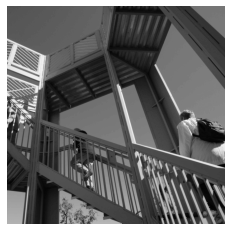

In [ ]:
import matplotlib.pyplot as plt
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

In [ ]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]

In [ ]:
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]  
#filter = [ [-1, 0, 1], [-2, 0, 2],[-1, 0, 1] 
weight  = 1

In [ ]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      output_pixel = 0.0
      output_pixel = output_pixel + (i[x - 1, y-1] * filter[0][0])
      output_pixel = output_pixel + (i[x, y-1] * filter[0][1])
      output_pixel = output_pixel + (i[x + 1, y-1] * filter[0][2])
      output_pixel = output_pixel + (i[x-1, y] * filter[1][0])
      output_pixel = output_pixel + (i[x, y] * filter[1][1])
      output_pixel = output_pixel + (i[x+1, y] * filter[1][2])
      output_pixel = output_pixel + (i[x-1, y+1] * filter[2][0])
      output_pixel = output_pixel + (i[x, y+1] * filter[2][1])
      output_pixel = output_pixel + (i[x+1, y+1] * filter[2][2])
      output_pixel = output_pixel * weight
      if(output_pixel<0):
        output_pixel=0
      if(output_pixel>255):
        output_pixel=255
      i_transformed[x, y] = output_pixel

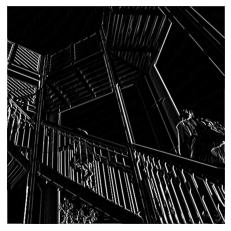

In [ ]:
plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i_transformed)
plt.show()

# **Image filtering**

## Blurring/smoothing

Gaussian filter from scipy.ndimage:

In [ ]:
from scipy import misc
from scipy import ndimage

face = misc.face(gray=True)
blurred_face = ndimage.gaussian_filter(face, sigma=3)
very_blurred = ndimage.gaussian_filter(face, sigma=5)

(-0.5, 1023.5, 767.5, -0.5)

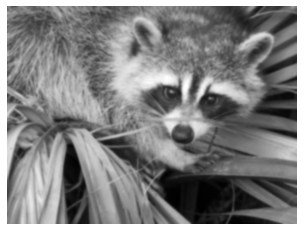

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(blurred_face)
plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

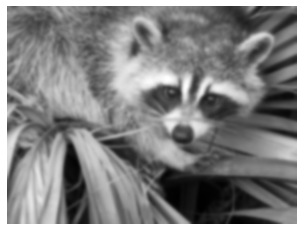

In [ ]:
plt.imshow(very_blurred)
plt.axis('off')

(-0.5, 1023.5, 767.5, -0.5)

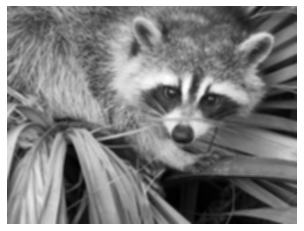

In [ ]:
very_blurred2 = ndimage.uniform_filter(face, size=11)
plt.imshow(very_blurred2)
plt.axis('off')

## Sharpening

In [ ]:
from scipy import misc
face = misc.face(gray=True).astype(float)
blurred_f = ndimage.gaussian_filter(face, 3)

In [ ]:
filter_blurred_f = ndimage.gaussian_filter(blurred_f, 1)
alpha = 30
sharpened = blurred_f + alpha * (blurred_f - filter_blurred_f)

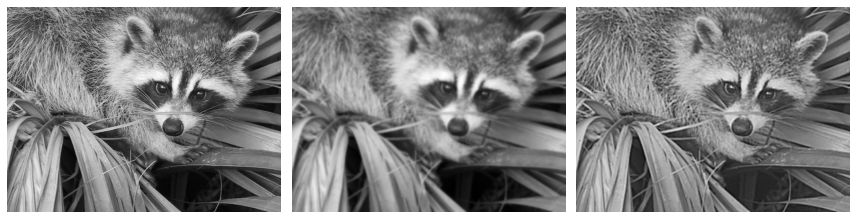

In [ ]:
plt.figure(figsize=(12, 4))

plt.subplot(131)
plt.imshow(face, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(132)
plt.imshow(blurred_f, cmap=plt.cm.gray)
plt.axis('off')
plt.subplot(133)
plt.imshow(sharpened, cmap=plt.cm.gray)
plt.axis('off')

plt.tight_layout()
plt.show()

## Denoising

In [ ]:
#noisy face
from scipy import misc
import numpy as np

f = misc.face(gray=True)
f = f[230:290, 220:320]
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

In [ ]:
gauss_denoised = ndimage.gaussian_filter(noisy, 2)
med_denoised = ndimage.median_filter(noisy, 3)

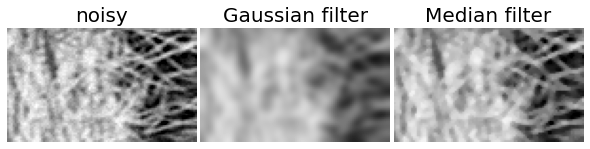

In [ ]:
plt.figure(figsize=(8,2.8))

plt.subplot(131)
plt.imshow(noisy, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('noisy', fontsize=20)
plt.subplot(132)
plt.imshow(gauss_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Gaussian filter', fontsize=20)
plt.subplot(133)
plt.imshow(med_denoised, cmap=plt.cm.gray, vmin=40, vmax=220)
plt.axis('off')
plt.title('Median filter', fontsize=20)

plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)
plt.show()

In [ ]:
im = np.zeros((20, 20))
im[5:-5, 5:-5] = 1
im = ndimage.distance_transform_bf(im)
im_noise = im + 0.2 * np.random.randn(*im.shape)
im_med = ndimage.median_filter(im_noise, 3)

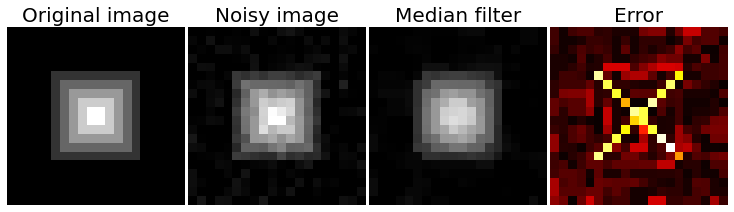

In [ ]:
plt.figure(figsize=(10, 5))

plt.subplot(141)
plt.imshow(im, interpolation='nearest')
plt.axis('off')
plt.title('Original image', fontsize=20)
plt.subplot(142)
plt.imshow(im_noise, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Noisy image', fontsize=20)
plt.subplot(143)
plt.imshow(im_med, interpolation='nearest', vmin=0, vmax=5)
plt.axis('off')
plt.title('Median filter', fontsize=20)
plt.subplot(144)
plt.imshow(np.abs(im - im_med), cmap=plt.cm.hot, interpolation='nearest')
plt.axis('off')
plt.title('Error', fontsize=20)


plt.subplots_adjust(wspace=0.02, hspace=0.02, top=0.9, bottom=0, left=0,
                    right=1)

plt.show()

## Edge detection

In [ ]:
im = np.zeros((256, 256))
im[64:-64, 64:-64] = 1

im = ndimage.rotate(im, 15, mode='constant')
im = ndimage.gaussian_filter(im, 8)

In [ ]:
sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

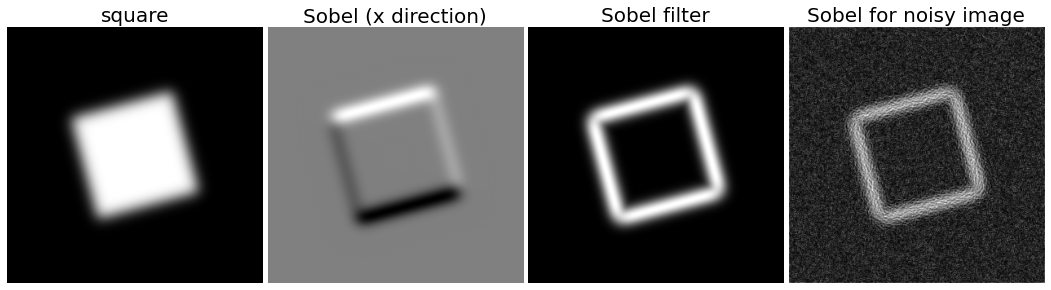

In [ ]:
plt.figure(figsize=(16, 5))
plt.subplot(141)
plt.imshow(im, cmap=plt.cm.gray)
plt.axis('off')
plt.title('square', fontsize=20)
plt.subplot(142)
plt.imshow(sx)
plt.axis('off')
plt.title('Sobel (x direction)', fontsize=20)
plt.subplot(143)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel filter', fontsize=20)

im += 0.07*np.random.random(im.shape)

sx = ndimage.sobel(im, axis=0, mode='constant')
sy = ndimage.sobel(im, axis=1, mode='constant')
sob = np.hypot(sx, sy)

plt.subplot(144)
plt.imshow(sob)
plt.axis('off')
plt.title('Sobel for noisy image', fontsize=20)



plt.subplots_adjust(wspace=0.02, hspace=0.02, top=1, bottom=0, left=0, right=0.9)

plt.show()